In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 1.0  16.7  1688.0 ...  7.2  1.0  0.0]
 [ 1.0  6.7  1024.3 ...  8.1  0.9  0.0]
 [ 0.0  16.9  844.7 ...  4.0  1.0  0.0]
 ...
 [ 1.0  19.5  1229.0 ...  4.9  1.0  0.0]
 [ 0.0  7.8  257.5 ...  2.3  1.0  0.0]
 [ 0.0  10.8  712.3 ...  5.4  1.0  0.0]]


In [6]:
#Dropping everything below 60% accuracy
brainT = np.delete(brainT, 13, axis = 1)
brainT = np.delete(brainT, 12, axis = 1)
brainT = np.delete(brainT, 7, axis = 1)
brainT = np.delete(brainT, 3, axis = 1)
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 1.0  1688.0  0.0 ...  0.0  0.4  7.2]
 [ 1.0  1024.3  0.0 ...  0.0  0.4  8.1]
 [ 0.0  844.7  0.1 ...  0.1  0.5  4.0]
 ...
 [ 1.0  1229.0  0.1 ...  0.0  0.5  4.9]
 [ 0.0  257.5  0.1 ...  0.1  0.6  2.3]
 [ 0.0  712.3  0.1 ...  0.1  0.5  5.4]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 2s 9ms/step - loss: 16.0519 - accuracy: 0.4320 - val_loss: 2.3065 - val_accuracy: 0.4167
Epoch 2/500
83/83 [==============================] - 0s 5ms/step - loss: 1.0371 - accuracy: 0.5159 - val_loss: 0.9195 - val_accuracy: 0.4743
Epoch 3/500
83/83 [==============================] - 0s 5ms/step - loss: 0.7515 - accuracy: 0.5812 - val_loss: 0.6264 - val_accuracy: 0.7154
Epoch 4/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.6648 - val_loss: 0.5921 - val_accuracy: 0.6658
Epoch 5/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6402 - accuracy: 0.7035 - val_loss: 0.6202 - val_accuracy: 0.6170
Epoch 6/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6093 - accuracy: 0.7350 - val_loss: 0.6179 - val_accuracy: 0.6578
Epoch 7/500
83/83 [==============================] - 0s 5ms/step - loss: 0.5823 - accuracy: 0.7589 - val_loss: 0.8614 - val_accuracy: 0.5106
Epoch 8/500


Epoch 59/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1937 - accuracy: 0.9343 - val_loss: 0.2210 - val_accuracy: 0.8963
Epoch 60/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1907 - accuracy: 0.9343 - val_loss: 0.1874 - val_accuracy: 0.9379
Epoch 61/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1898 - accuracy: 0.9370 - val_loss: 0.1607 - val_accuracy: 0.9592
Epoch 62/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1869 - accuracy: 0.9362 - val_loss: 0.1677 - val_accuracy: 0.9441
Epoch 63/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1876 - accuracy: 0.9328 - val_loss: 0.2191 - val_accuracy: 0.8989
Epoch 64/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1854 - accuracy: 0.9343 - val_loss: 0.1945 - val_accuracy: 0.9273
Epoch 65/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1829 - accuracy: 0.9389 - val_loss: 0.1599 - val_accuracy: 0.9521
Epoch 

83/83 [==============================] - 0s 6ms/step - loss: 0.1372 - accuracy: 0.9503 - val_loss: 0.1115 - val_accuracy: 0.9637
Epoch 117/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1373 - accuracy: 0.9468 - val_loss: 0.2011 - val_accuracy: 0.9149
Epoch 118/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1398 - accuracy: 0.9495 - val_loss: 0.1427 - val_accuracy: 0.9468
Epoch 119/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1353 - accuracy: 0.9495 - val_loss: 0.2280 - val_accuracy: 0.8945
Epoch 120/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1356 - accuracy: 0.9487 - val_loss: 0.1090 - val_accuracy: 0.9628
Epoch 121/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1353 - accuracy: 0.9510 - val_loss: 0.1196 - val_accuracy: 0.9512
Epoch 122/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1354 - accuracy: 0.9491 - val_loss: 0.1732 - val_accuracy: 0.9255
Epoch 123/500

83/83 [==============================] - 1s 7ms/step - loss: 0.1083 - accuracy: 0.9552 - val_loss: 0.0942 - val_accuracy: 0.9619
Epoch 174/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1158 - accuracy: 0.9556 - val_loss: 0.1505 - val_accuracy: 0.9326
Epoch 175/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1067 - accuracy: 0.9609 - val_loss: 0.0857 - val_accuracy: 0.9716
Epoch 176/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1068 - accuracy: 0.9579 - val_loss: 0.1602 - val_accuracy: 0.9317
Epoch 177/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1134 - accuracy: 0.9575 - val_loss: 0.0836 - val_accuracy: 0.9743
Epoch 178/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1092 - accuracy: 0.9575 - val_loss: 0.0879 - val_accuracy: 0.9734
Epoch 179/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1073 - accuracy: 0.9567 - val_loss: 0.1453 - val_accuracy: 0.9406
Epoch 180/500

83/83 [==============================] - 0s 6ms/step - loss: 0.0953 - accuracy: 0.9632 - val_loss: 0.1224 - val_accuracy: 0.9521
Epoch 231/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0934 - accuracy: 0.9643 - val_loss: 0.1070 - val_accuracy: 0.9548
Epoch 232/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0968 - accuracy: 0.9613 - val_loss: 0.0702 - val_accuracy: 0.9778
Epoch 233/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0927 - accuracy: 0.9636 - val_loss: 0.0745 - val_accuracy: 0.9716
Epoch 234/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0961 - accuracy: 0.9601 - val_loss: 0.0700 - val_accuracy: 0.9743
Epoch 235/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0926 - accuracy: 0.9647 - val_loss: 0.0732 - val_accuracy: 0.9707
Epoch 236/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0941 - accuracy: 0.9658 - val_loss: 0.0676 - val_accuracy: 0.9787
Epoch 237/500

83/83 [==============================] - 1s 7ms/step - loss: 0.0845 - accuracy: 0.9677 - val_loss: 0.0590 - val_accuracy: 0.9814
Epoch 288/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0842 - accuracy: 0.9662 - val_loss: 0.0587 - val_accuracy: 0.9796
Epoch 289/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0827 - accuracy: 0.9692 - val_loss: 0.1373 - val_accuracy: 0.9468
Epoch 290/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0840 - accuracy: 0.9689 - val_loss: 0.1160 - val_accuracy: 0.9521
Epoch 291/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0839 - accuracy: 0.9700 - val_loss: 0.0671 - val_accuracy: 0.9823
Epoch 292/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0830 - accuracy: 0.9692 - val_loss: 0.0638 - val_accuracy: 0.9752
Epoch 293/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0832 - accuracy: 0.9674 - val_loss: 0.0824 - val_accuracy: 0.9681
Epoch 294/500

83/83 [==============================] - 0s 6ms/step - loss: 0.0752 - accuracy: 0.9730 - val_loss: 0.1040 - val_accuracy: 0.9619
Epoch 345/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0784 - accuracy: 0.9715 - val_loss: 0.0554 - val_accuracy: 0.9867
Epoch 346/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0743 - accuracy: 0.9742 - val_loss: 0.0748 - val_accuracy: 0.9725
Epoch 347/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0785 - accuracy: 0.9723 - val_loss: 0.0657 - val_accuracy: 0.9867
Epoch 348/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0765 - accuracy: 0.9730 - val_loss: 0.0722 - val_accuracy: 0.9796
Epoch 349/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0770 - accuracy: 0.9730 - val_loss: 0.0551 - val_accuracy: 0.9787
Epoch 350/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0793 - accuracy: 0.9700 - val_loss: 0.0567 - val_accuracy: 0.9796
Epoch 351/500

83/83 [==============================] - 1s 7ms/step - loss: 0.0765 - accuracy: 0.9734 - val_loss: 0.1394 - val_accuracy: 0.9415
Epoch 402/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0722 - accuracy: 0.9753 - val_loss: 0.0496 - val_accuracy: 0.9876
Epoch 403/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0723 - accuracy: 0.9765 - val_loss: 0.0534 - val_accuracy: 0.9885
Epoch 404/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0748 - accuracy: 0.9723 - val_loss: 0.0577 - val_accuracy: 0.9787
Epoch 405/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0723 - accuracy: 0.9753 - val_loss: 0.0513 - val_accuracy: 0.9885
Epoch 406/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0699 - accuracy: 0.9765 - val_loss: 0.0518 - val_accuracy: 0.9840
Epoch 407/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0741 - accuracy: 0.9734 - val_loss: 0.1580 - val_accuracy: 0.9477
Epoch 408/500

83/83 [==============================] - 1s 9ms/step - loss: 0.0720 - accuracy: 0.9749 - val_loss: 0.0528 - val_accuracy: 0.9867
Epoch 459/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0737 - accuracy: 0.9727 - val_loss: 0.0508 - val_accuracy: 0.9858
Epoch 460/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0764 - accuracy: 0.9738 - val_loss: 0.0705 - val_accuracy: 0.9734
Epoch 461/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0753 - accuracy: 0.9749 - val_loss: 0.0811 - val_accuracy: 0.9716
Epoch 462/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0689 - accuracy: 0.9749 - val_loss: 0.1337 - val_accuracy: 0.9406
Epoch 463/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0696 - accuracy: 0.9753 - val_loss: 0.0687 - val_accuracy: 0.9734
Epoch 464/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0709 - accuracy: 0.9765 - val_loss: 0.0533 - val_accuracy: 0.9867
Epoch 465/500

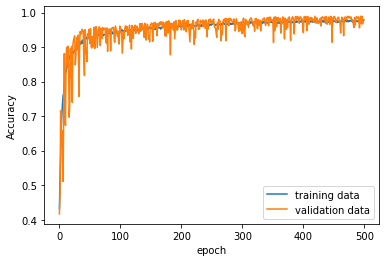

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 4ms/step - loss: 0.0709 - accuracy: 0.9742


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 0.9787


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]
83/83 [==============================] - 1s 3ms/step
[[ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9963833634719711
0.9451114922813036
0.9700704225352113


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 1.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]]
36/36 [==============================] - 0s 4ms/step
[[ 0.6]
 [ 1.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

1.0
0.9535783365570599
0.9762376237623763
